What is Power Analysis?
Power analysis is a statistical method used to determine the minimum sample size required for an experiment to detect a meaningful effect, given a specified significance level, statistical power, and effect size.

Why is it important for experimental Design?
It  helps deetermine the minimum sample size to get a meaningful impact

What are Type I and Type II errors in the context of hypotheses testing
1. Type I error is detecting a significant difference  that is simple due to chance
2. Type 2 error is not detecting a significant difference when there is an actual difference

How would you explain  the relationship between sample size and power to a non statistician?

You want to keep a resonable power to ensure you actually get the underlying impact of your experiment, although when you increase the power , you also increase the sample size, but a nice sweet spot is a power of 80%. If your sample is too small you are running a blind experiment, but if your sample size is too large you get issues with the feasibility of  implementing your experiment

In [ ]:
# prompt: install pwr package

install.packages("pwr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
c(4,6,8)

[1] 4 6 8

In [ ]:
# prompt: pwr.t.test(n=5, d=0.8, sig.level=0.05, type="two.sample")

library(pwr)
pwr.t.test(n=5, d=0.8, sig.level=0.05, type="two.sample")


     Two-sample t test power calculation 

              n = 5
              d = 0.8
      sig.level = 0.05
          power = 0.2007395
    alternative = two.sided

NOTE: n is number in *each* group


In [ ]:
pwr.t.test(n=50, d=0.8, sig.level=0.05, type="two.sample")


     Two-sample t test power calculation 

              n = 50
              d = 0.8
      sig.level = 0.05
          power = 0.9772791
    alternative = two.sided

NOTE: n is number in *each* group


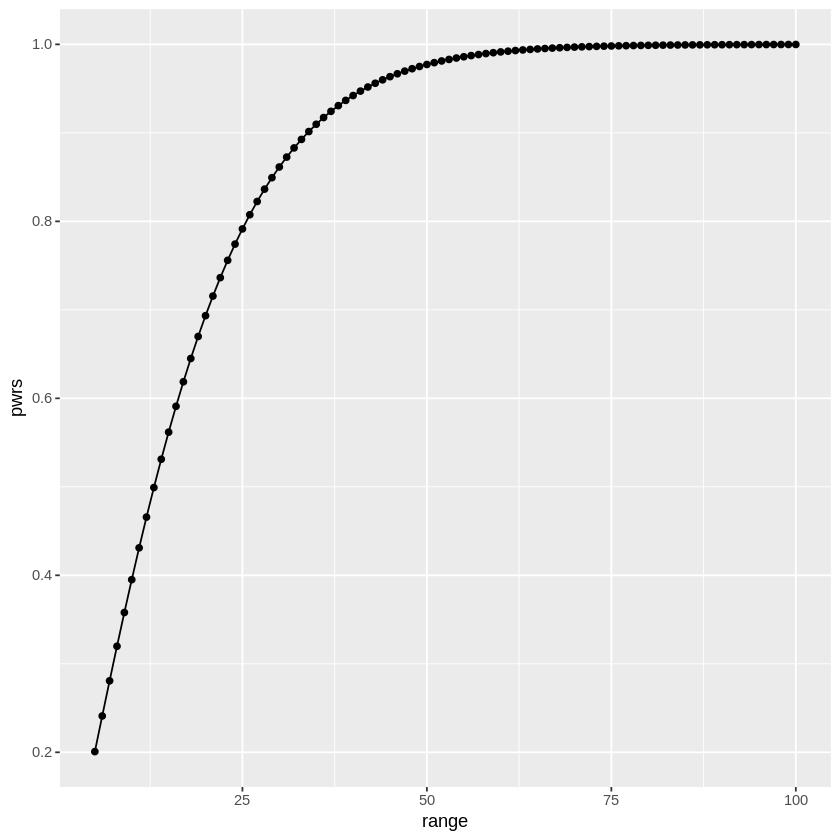

In [ ]:
# prompt: generate a graph to show the ranges of power when sample size changes from  5 to 100 in pwr.t.test(n=50, d=0.8, sig.level=0.05, type="two.sample".) you should create a table for both values first using a for loop

range = c(5:100)
pwrs = c()
for (x in range){
  pwrs = c(pwrs,pwr.t.test(n=x, d=0.8, sig.level=0.05, type="two.sample")$power)
}
df = cbind.data.frame(range, pwrs)

library(ggplot2)
ggplot(df, aes(x = range, y = pwrs)) +
  geom_point() +
  geom_line()

In [ ]:
pwr.t2n.test(n1=100,n2=100,d=0.5, sig.level=0.05, alternative="two.sided")


     t test power calculation 

             n1 = 100
             n2 = 100
              d = 0.5
      sig.level = 0.05
          power = 0.9404272
    alternative = two.sided


In [ ]:
pwr.t2n.test(n1=50,n2=150,d=0.5, sig.level=0.05, alternative="two.sided")


     t test power calculation 

             n1 = 50
             n2 = 150
              d = 0.5
      sig.level = 0.05
          power = 0.8614849
    alternative = two.sided


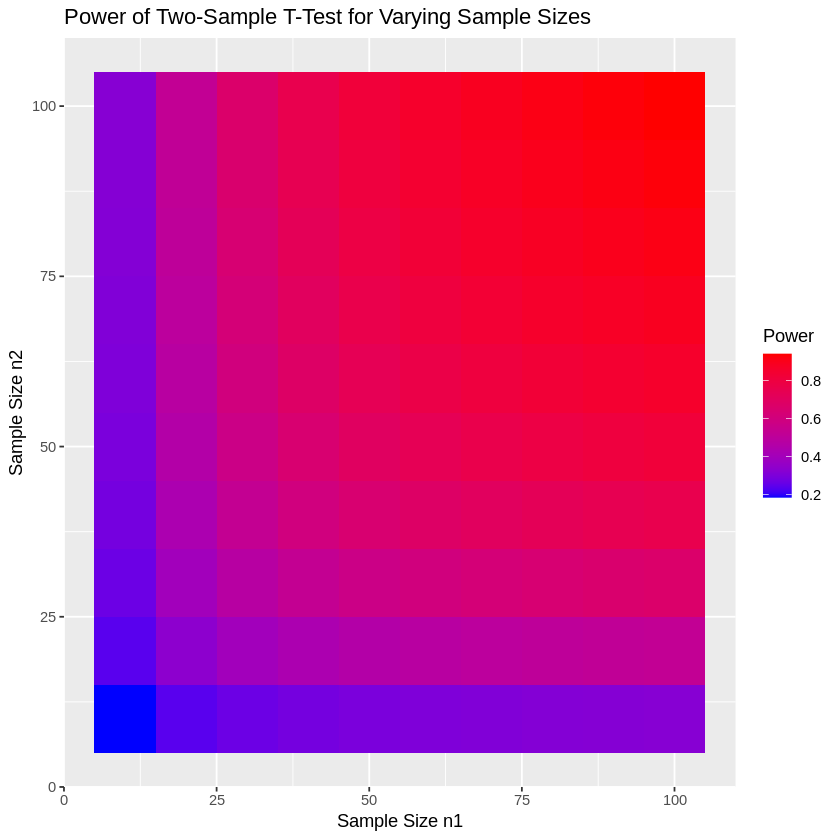

In [ ]:
# generate a graph to show the ranges of power when n1 and n2 varies between 20 and 200 in pwr.t2n.test(n1=50,n2=150,d=0.5, sig.level=0.05, alternative="two.sided") you should create a table for both values first using a for loop

n_range <- seq(10, 100, by = 10)
power_values <- data.frame(n1 = integer(), n2 = integer(), power = numeric())

for (n1_val in n_range) {
  for (n2_val in n_range) {
    power_result <- pwr.t2n.test(n1 = n1_val, n2 = n2_val, d = 0.5, sig.level = 0.05, alternative = "two.sided")
    power_values <- rbind(power_values, data.frame(n1 = n1_val, n2 = n2_val, power = power_result$power))
  }
}

ggplot(power_values, aes(x = n1, y = n2, fill = power)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Power of Two-Sample T-Test for Varying Sample Sizes",
       x = "Sample Size n1",
       y = "Sample Size n2",
       fill = "Power")

In [ ]:
# A researcher wants to detect a medium effect (d=0.5) with 80% power, what sample size is needed

pwr.t.test(d=0.5, power=0.8, sig.level=0.05, type="two.sample")


     Two-sample t test power calculation 

              n = 63.76561
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [ ]:
# A study has 30 participants per group. Whats the power to detect effec d=0.3

pwr.t.test(n=30, d=0.3, sig.level=0.05, type="two.sample")


     Two-sample t test power calculation 

              n = 30
              d = 0.3
      sig.level = 0.05
          power = 0.2078518
    alternative = two.sided

NOTE: n is number in *each* group
